<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/n_hw_1v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import math
import statistics
import scipy.stats
import copy
from copy import deepcopy

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH_TO_DATA = '/content/drive/MyDrive/dataset/'

In [ ]:
N_PARTITION = 4

DATASET_PATH = os.path.join(PATH_TO_DATA, 'ID_data_mass_18122012.csv')

In [ ]:
df = pd.read_csv(DATASET_PATH, encoding='windows-1251', skiprows = 0, on_bad_lines='skip', sep=';', header=[0,1,2], na_values=['-', '#ЗНАЧ!', '', 'не спускался'], decimal=',')
df.shape


(186, 34)

In [ ]:
df.head(10)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,осредненные параметры,Unnamed: 5_level_0,Unnamed: 6_level_0,На конец режима,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Стандартные условия,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Линейные условия,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Unnamed: 32_level_0,Unnamed: 33_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст,Рзаб,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ
,№,дд.мм.гггг,м,мм,бара,бара,бара,бар,бар,бар,С,С,С,С,1000 м3/сут,м3/сут,м3/сут,1000 м3/сут,м3/сут,м3/сут,м3/сут,м,МПа,МПа,МПа,атм,бар,кг/м3,кг/м3,кг/м3,б/р,кг/с,г/м3,т/тыс.м3
0,804.0,05.06.08,3576.3,7.94,249.60,370.10,101.80,249.00,359.60,101.80,53.0,"31,70",103.20,32.50,214.70,83.6,0.4,231.25,1610.37,131.3,0.4,56.8,45.25,56.5,NaN,93.6,92.38,0.8060,801.0,1000.0,0.6694,2.78,311.91,NaN
1,804.0,06.06.08,3576.3,9.53,233.50,364.60,101.30,231.00,338.10,102.40,58.8,"37,60",103.00,38.60,290.59,104.7,1.4,309.00,2310.23,158.5,1.4,56.8,45.25,56.5,NaN,92.9,91.69,0.8060,801.0,1000.0,0.6694,3.70,288.60,NaN
2,804.0,07.06.08,3576.3,11.11,213.40,357.10,101.60,211.00,314.80,100.60,63.6,"42,80",102.60,43.40,368.04,114.3,1.9,388.11,3039.49,172.3,1.9,56.8,45.25,56.5,NaN,91.4,90.20,0.8060,801.0,1000.0,0.6694,4.52,248.79,NaN
3,804.0,08.06.08,3576.3,12.70,191.60,347.40,98.40,187.00,291.50,99.00,64.7,"46,20",102.00,46.10,434.66,121.3,3.3,455.21,3824.08,181.5,3.3,56.8,45.25,56.5,NaN,89.2,88.03,0.8060,801.0,1000.0,0.6694,5.22,223.56,NaN
4,804.0,09.06.08,3576.3,14.29,171.90,337.70,99.20,169.00,270.30,99.50,64.0,"49,40",104.40,49.90,483.28,129.8,4.6,504.59,4299.10,190.6,4.7,56.8,45.25,56.5,NaN,89.7,88.53,0.8060,801.0,1000.0,0.6694,5.77,215.15,NaN
5,804.0,17.06.11,3576.3,9.53,199.50,286.40,106.36,199.50,286.60,106.19,57.5,"38,80",102.64,38.98,251.70,76.8,0.6,268.90,1921.00,119.0,0.6,56.8,41.22,48.3,NaN,90.7,89.51,0.8127,789.8,1000.0,0.6750,3.08,241.13,NaN
6,807.0,16.09.04,3590.0,7.93,284.32,391.82,NaN,284.32,391.82,NaN,46.0,NaN,102.80,NaN,198.90,70.6,0.0,206.06,NaN,NaN,NaN,57.2,41.88,52.3,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,807.0,16.09.04,3590.0,11.11,270.94,384.22,NaN,270.94,384.22,NaN,56.0,NaN,102.90,NaN,341.50,129.3,0.1,354.65,NaN,NaN,NaN,57.2,41.88,52.3,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col = df.columns

In [ ]:
new_names = []
new_names.append('№')
new_names.append('Дата')
for string in col[2:]:
  c_name = string[-2] + ' (' + string[-1] + ')'
  new_names.append(c_name)


In [ ]:
#new_names

In [ ]:
new_names[14] = 'Дебит газа с. у. (1000 м3/сут)'
new_names[16] = 'Дебит воды с. у. (м3/сут)'
new_names[18] = 'Дебит газа л. у. (м3/сут)'
new_names[20] = 'Дебит воды л. у. (м3/сут)'

In [ ]:
df.columns = new_names

In [ ]:
for i in range(df.shape[0]):
  st = str(df['Тна шлейфе ( С)'][i])
  tpl = st.split(',')
  if(len(tpl) > 1):
    df.at[i,'Тна шлейфе ( С)'] = float(tpl[0] + '.' + tpl[1])
  else: 
    df.at[i,'Тна шлейфе ( С)'] = float(tpl[0])

In [ ]:
df['Тна шлейфе ( С)'] = df['Тна шлейфе ( С)'].astype(float)

In [ ]:
df = df.drop(df.index[pd.isna(df['КГФ (г/м3)'])] & df.index[pd.isna(df['КГФ (т/тыс.м3)'])] & df.index[pd.isna(df['G_total (кг/с)'])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
df.shape

(93, 34)

In [ ]:
#сливаем два целевых в один
obj1 = df.columns[-2]
obj2 = df.columns[-1]

In [ ]:
obj2

'КГФ (т/тыс.м3)'

In [ ]:
def ISNAN(value):
    if value != value:
        return True
    return False

for index, row in df.iterrows():
    if(ISNAN(df[obj1][index])):
        df.loc[index, obj1] = df[obj2][index]*1000



In [ ]:
df = df.drop(df.columns[-1], axis = 1)

In [ ]:
pd.options.display.max_rows = 200
#Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

#Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)


In [ ]:
df

,№,Дата,Глубина манометра (м),Dшт (мм),Руст (бара),Рзаб (бара),Pлин (бара),Руст (бар),Рзаб (бар),Рлин (бар),Туст ( С),Тна шлейфе ( С),Тзаб ( С),Tлин ( С),Дебит газа с. у. (1000 м3/сут),Дебит ст. конд. (м3/сут),Дебит воды с. у. (м3/сут),Дебит смеси (1000 м3/сут),Дебит газа л. у. (м3/сут),Дебит кон нестабильный (м3/сут),Дебит воды л. у. (м3/сут),Нэф (м),Рпл. Тек (послед точка на КВД) (МПа),Рпл. Тек (Расчет по КВД) (МПа),Рпл. Тек (Карноухов) (МПа),Pсб ( атм),Pсб ( бар),Ro_g (кг/м3),Ro_c (кг/м3),Ro_w (кг/м3),Удельная плотность газа (б/р),G_total (кг/с),КГФ (г/м3)
0,804.0,05.06.08,3576.3,7.94,249.60,370.10,101.80,249.00,359.6,101.80,53.0,31.7,103.20,32.50,214.70,83.60,0.40,231.25,1610.37,131.3,0.4,56.80,45.25,56.50,NaN,93.6,92.38,0.8060,801.00,1000.0,0.6694,2.78,311.91
1,804.0,06.06.08,3576.3,9.53,233.50,364.60,101.30,231.00,338.1,102.40,58.8,37.6,103.00,38.60,290.59,104.70,1.40,309.00,2310.23,158.5,1.4,56.80,45.25,56.50,NaN,92.9,91.69,0.8060,801.00,1000.0,0.6694,3.70,288.60
2,804.0,07.06.08,3576.3,11.11,213.40,357.10,101.60,211.00,314.8,100.60,63.6,42.8,102.60,43.40,368.04,114.30,1.90,388.11,3039.49,172.3,1.9,56.80,45.25,56.50,NaN,91.4,90.20,0.8060,801.00,1000.0,0.6694,4.52,248.79
3,804.0,08.06.08,3576.3,12.70,191.60,347.40,98.40,187.00,291.5,99.00,64.7,46.2,102.00,46.10,434.66,121.30,3.30,455.21,3824.08,181.5,3.3,56.80,45.25,56.50,NaN,89.2,88.03,0.8060,801.00,1000.0,0.6694,5.22,223.56
4,804.0,09.06.08,3576.3,14.29,171.90,337.70,99.20,169.00,270.3,99.50,64.0,49.4,104.40,49.90,483.28,129.80,4.60,504.59,4299.10,190.6,4.7,56.80,45.25,56.50,NaN,89.7,88.53,0.8060,801.00,1000.0,0.6694,5.77,215.15
5,804.0,17.06.11,3576.3,9.53,199.50,286.40,106.36,199.50,286.6,106.19,57.5,38.8,102.64,38.98,251.70,76.80,0.60,268.90,1921.00,119.0,0.6,56.80,41.22,48.30,NaN,90.7,89.51,0.8127,789.80,1000.0,0.6750,3.08,241.13
10,807.0,09.05.07,3667.0,7.94,252.00,354.33,102.93,252.00,354.2,101.57,56.0,NaN,105.30,33.00,234.86,56.07,0.00,261.28,1807.40,90.4,0.0,57.20,38.74,50.86,50.1,100.9,99.58,NaN,787.00,NaN,0.6600,NaN,188.00
11,807.0,10.05.07,3667.0,9.53,250.00,350.20,103.19,250.00,349.1,103.32,61.0,NaN,105.20,39.06,326.22,73.89,0.00,362.08,2532.40,118.0,0.0,57.20,38.74,50.86,50.1,100.1,98.79,NaN,787.00,NaN,0.6600,NaN,178.00
12,807.0,11.05.07,3667.0,11.11,240.00,344.00,105.67,240.00,344.1,105.59,65.0,NaN,105.20,44.90,429.72,92.13,1.01,476.20,3392.30,146.0,1.0,57.20,38.74,50.86,50.1,102.0,100.67,NaN,787.00,NaN,0.6600,NaN,169.00
13,807.0,12.05.07,3667.0,12.70,228.00,336.70,108.10,228.00,343.0,108.14,42.0,NaN,105.10,49.84,532.28,109.81,1.38,589.14,4228.80,175.5,1.4,57.20,38.74,50.86,50.1,103.8,102.44,NaN,787.00,NaN,0.6600,NaN,162.00


In [ ]:
target = ['КГФ (г/м3)', 'G_total (кг/с)']
calculated = ['Pсб ( бар)', 'Ro_g (кг/м3)',  'G_total (кг/с)']
vrb = [element for element in df.columns if (element not in target and element not in calculated)]
ctgr = ['№',	'Дата']
nmr = [element for element in vrb if element not in ctgr]
#nmr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 167
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   №                                     93 non-null     float64
 1   Дата                                  93 non-null     object 
 2   Глубина манометра (м)                 90 non-null     float64
 3   Dшт (мм)                              93 non-null     float64
 4   Руст (бара)                           93 non-null     float64
 5   Рзаб (бара)                           90 non-null     float64
 6   Pлин (бара)                           93 non-null     float64
 7   Руст (бар)                            93 non-null     float64
 8   Рзаб (бар)                            90 non-null     float64
 9   Рлин (бар)                            93 non-null     float64
 10  Туст ( С)                             93 non-null     float64
 11  Тна шлейфе ( С)     

In [ ]:
for col in df.columns:
  print(col, '-', len(pd.unique(df[col])))

№ - 8
Дата - 89
Глубина манометра (м) - 21
Dшт (мм) - 10
Руст (бара) - 87
Рзаб (бара) - 89
Pлин (бара) - 90
Руст (бар) - 73
Рзаб (бар) - 90
Рлин (бар) - 87
Туст ( С) - 51
Тна шлейфе ( С) - 58
Тзаб ( С) - 68
Tлин ( С) - 89
Дебит газа с. у. (1000 м3/сут) - 93
Дебит ст. конд. (м3/сут) - 92
Дебит воды с. у. (м3/сут) - 69
Дебит смеси (1000 м3/сут) - 90
Дебит газа л. у. (м3/сут) - 92
Дебит кон нестабильный (м3/сут) - 90
Дебит воды л. у. (м3/сут) - 42
Нэф (м) - 14
Рпл. Тек (послед точка на КВД) (МПа) - 22
Рпл. Тек (Расчет по КВД) (МПа) - 19
Рпл. Тек (Карноухов) (МПа) - 14
Pсб ( атм) - 70
Pсб ( бар) - 70
Ro_g (кг/м3) - 7
Ro_c (кг/м3) - 25
Ro_w (кг/м3) - 2
Удельная плотность газа  (б/р) - 12
G_total (кг/с) - 24
КГФ (г/м3) - 72


In [ ]:
df.describe()

,№,Глубина манометра (м),Dшт (мм),Руст (бара),Рзаб (бара),Pлин (бара),Руст (бар),Рзаб (бар),Рлин (бар),Туст ( С),Тна шлейфе ( С),Тзаб ( С),Tлин ( С),Дебит газа с. у. (1000 м3/сут),Дебит ст. конд. (м3/сут),Дебит воды с. у. (м3/сут),Дебит смеси (1000 м3/сут),Дебит газа л. у. (м3/сут),Дебит кон нестабильный (м3/сут),Дебит воды л. у. (м3/сут),Нэф (м),Рпл. Тек (послед точка на КВД) (МПа),Рпл. Тек (Расчет по КВД) (МПа),Рпл. Тек (Карноухов) (МПа),Pсб ( атм),Pсб ( бар),Ro_g (кг/м3),Ro_c (кг/м3),Ro_w (кг/м3),Удельная плотность газа (б/р),G_total (кг/с),КГФ (г/м3)
count,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,90.000000,93.000000,93.000000,93.000000,93.000000,89.000000,93.000000,93.000000,93.000000,93.000000,88.000000,81.000000,64.000000,93.000000,93.000000,23.000000,93.000000,23.0,93.000000,23.000000,93.000000
mean,18004.150538,3524.086667,10.951183,228.293871,331.762222,99.861075,227.644624,330.334444,98.005376,56.172043,43.091667,104.961333,39.798172,394.402796,99.909355,2.133118,417.021348,3282.971075,164.151613,2.163441,52.703118,40.682727,50.943704,50.773437,95.162366,93.917849,0.807604,780.847527,1000.0,0.665334,5.743043,201.705806
std,7918.037821,144.474862,2.423172,41.897056,56.481226,7.300709,41.757260,56.357493,12.425643,11.250781,19.602337,1.250820,8.937833,150.354968,49.140437,1.875180,157.746136,1353.043607,85.225100,1.903132,12.149382,5.374353,4.378415,4.006591,5.136060,5.068641,0.015066,62.795111,0.0,0.020081,2.113176,49.253784
min,804.000000,3276.000000,6.350000,138.160000,174.000000,73.310000,136.000000,174.000000,40.740000,24.200000,14.000000,100.210000,16.200000,128.370000,33.630000,0.000000,136.820000,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,41.600000,85.500000,84.380000,0.787400,186.000000,1000.0,0.570000,2.780000,131.000000
25%,20503.000000,3427.625000,9.530000,201.640000,297.797500,95.950000,200.000000,294.625000,95.340000,50.300000,33.300000,104.525000,33.690000,287.950000,69.900000,0.700000,306.240000,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,49.425000,90.700000,89.510000,0.787400,782.000000,1000.0,0.660000,4.385000,164.000000
50%,21203.000000,3579.000000,11.110000,229.890000,337.790000,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,105.110000,40.520000,383.720000,89.800000,1.400000,401.390000,3112.000000,143.500000,1.400000,56.800000,39.465000,50.800000,50.900000,94.200000,92.970000,0.806000,787.000000,1000.0,0.670000,5.250000,192.000000
75%,22501.000000,3652.250000,12.700000,252.000000,364.150000,103.870000,252.000000,362.150000,104.000000,64.000000,46.375000,105.567500,47.800000,489.670000,117.600000,3.200000,509.050000,4165.000000,185.200000,3.300000,63.500000,42.860000,55.400000,52.700000,99.800000,98.490000,0.821300,793.700000,1000.0,0.680000,6.125000,224.000000
max,22503.000000,3670.000000,15.880000,337.110000,458.600000,121.680000,333.000000,458.500000,123.620000,75.000000,110.200000,107.070000,55.510000,846.820000,302.620000,8.340000,896.910000,6943.100000,492.800000,8.100000,72.540000,53.270000,56.700000,56.800000,104.000000,102.640000,0.824300,801.000000,1000.0,0.684700,10.930000,385.420000


In [ ]:
for col in nmr:
  if (df[col].isnull().sum() >= 0.4 * df.shape[0]):
    del df[col]
    nmr.remove(col)
    print(col, ' - deleted')
  else:
    df.loc[df[col].isna(), col] = np.nanmedian(df[col])
    assert not df[col].isna().sum()

Ro_w (кг/м3)  - deleted


In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

In [ ]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,№,Глубина манометра (м),Dшт (мм),Руст (бара),Рзаб (бара),Pлин (бара),Руст (бар),Рзаб (бар),Рлин (бар),Туст ( С),Тна шлейфе ( С),Тзаб ( С),Tлин ( С),Дебит газа с. у. (1000 м3/сут),Дебит ст. конд. (м3/сут),Дебит воды с. у. (м3/сут),Дебит смеси (1000 м3/сут),Дебит газа л. у. (м3/сут),Дебит кон нестабильный (м3/сут),Дебит воды л. у. (м3/сут),Нэф (м),Рпл. Тек (послед точка на КВД) (МПа),Рпл. Тек (Расчет по КВД) (МПа),Рпл. Тек (Карноухов) (МПа),Pсб ( атм),Pсб ( бар),Ro_g (кг/м3),Ro_c (кг/м3),Удельная плотность газа (б/р),G_total (кг/с),КГФ (г/м3)
№,1.00,0.32,0.02,0.07,0.05,0.22,0.07,0.04,0.19,0.13,0.03,0.29,0.06,0.08,0.05,0.08,0.07,0.10,0.08,0.08,0.28,0.17,0.21,0.05,0.12,0.12,0.02,0.11,0.01,0.45,0.08
Глубина манометра (м),0.32,1.00,0.14,0.13,0.29,0.11,0.13,0.27,0.08,0.22,0.16,0.20,0.00,0.21,0.29,0.10,0.23,0.24,0.28,0.12,0.53,0.49,0.42,0.59,0.14,0.14,0.11,0.24,0.14,0.34,0.23
Dшт (мм),0.02,0.14,1.00,0.39,0.17,0.00,0.39,0.18,0.11,0.54,0.38,0.02,0.82,0.87,0.62,0.54,0.83,0.89,0.51,0.53,0.17,0.25,0.05,0.10,0.03,0.03,0.04,0.09,0.19,0.74,0.23
Руст (бара),0.07,0.13,0.39,1.00,0.92,0.30,1.00,0.94,0.14,0.11,0.24,0.28,0.14,0.07,0.31,0.10,0.10,0.07,0.31,0.11,0.21,0.26,0.13,0.16,0.17,0.17,0.58,0.11,0.41,0.11,0.49
Рзаб (бара),0.05,0.29,0.17,0.92,1.00,0.34,0.91,0.98,0.15,0.29,0.35,0.21,0.03,0.28,0.50,0.19,0.30,0.15,0.49,0.19,0.34,0.45,0.23,0.23,0.16,0.16,0.64,0.03,0.54,0.26,0.54
Pлин (бара),0.22,0.11,0.00,0.30,0.34,1.00,0.30,0.32,0.58,0.06,0.12,0.34,0.39,0.16,0.20,0.14,0.20,0.04,0.23,0.15,0.01,0.13,0.00,0.02,0.18,0.18,0.70,0.06,0.32,0.28,0.14
Руст (бар),0.07,0.13,0.39,1.00,0.91,0.30,1.00,0.94,0.14,0.11,0.24,0.28,0.13,0.07,0.30,0.10,0.10,0.07,0.29,0.10,0.20,0.24,0.12,0.15,0.17,0.17,0.61,0.11,0.41,0.13,0.48
Рзаб (бар),0.04,0.27,0.18,0.94,0.98,0.32,0.94,1.00,0.14,0.24,0.34,0.24,0.00,0.28,0.50,0.16,0.31,0.15,0.49,0.16,0.31,0.43,0.19,0.25,0.11,0.11,0.59,0.05,0.52,0.29,0.51
Рлин (бар),0.19,0.08,0.11,0.14,0.15,0.58,0.14,0.14,1.00,0.07,0.07,0.13,0.19,0.06,0.06,0.15,0.03,0.16,0.07,0.15,0.17,0.07,0.08,0.03,0.08,0.08,0.79,0.05,0.16,0.31,0.17
Туст ( С),0.13,0.22,0.54,0.11,0.29,0.06,0.11,0.24,0.07,1.00,0.46,0.10,0.61,0.66,0.54,0.55,0.62,0.66,0.43,0.55,0.34,0.17,0.12,0.13,0.47,0.47,0.86,0.20,0.41,0.69,0.17


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['Рзаб (бара)', 'Руст (бар)', 'Рзаб (бар)', 'Tлин ( С)', 'Дебит газа с. у. (1000 м3/сут)', 'Дебит ст. конд. (м3/сут)', 'Дебит смеси (1000 м3/сут)', 'Дебит газа л. у. (м3/сут)', 'Дебит кон нестабильный (м3/сут)', 'Дебит воды л. у. (м3/сут)', 'Рпл. Тек (Карноухов) (МПа)', 'Pсб ( бар)', 'Ro_g (кг/м3)', 'Удельная плотность газа  (б/р)', 'G_total (кг/с)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
len(to_drop)

15

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

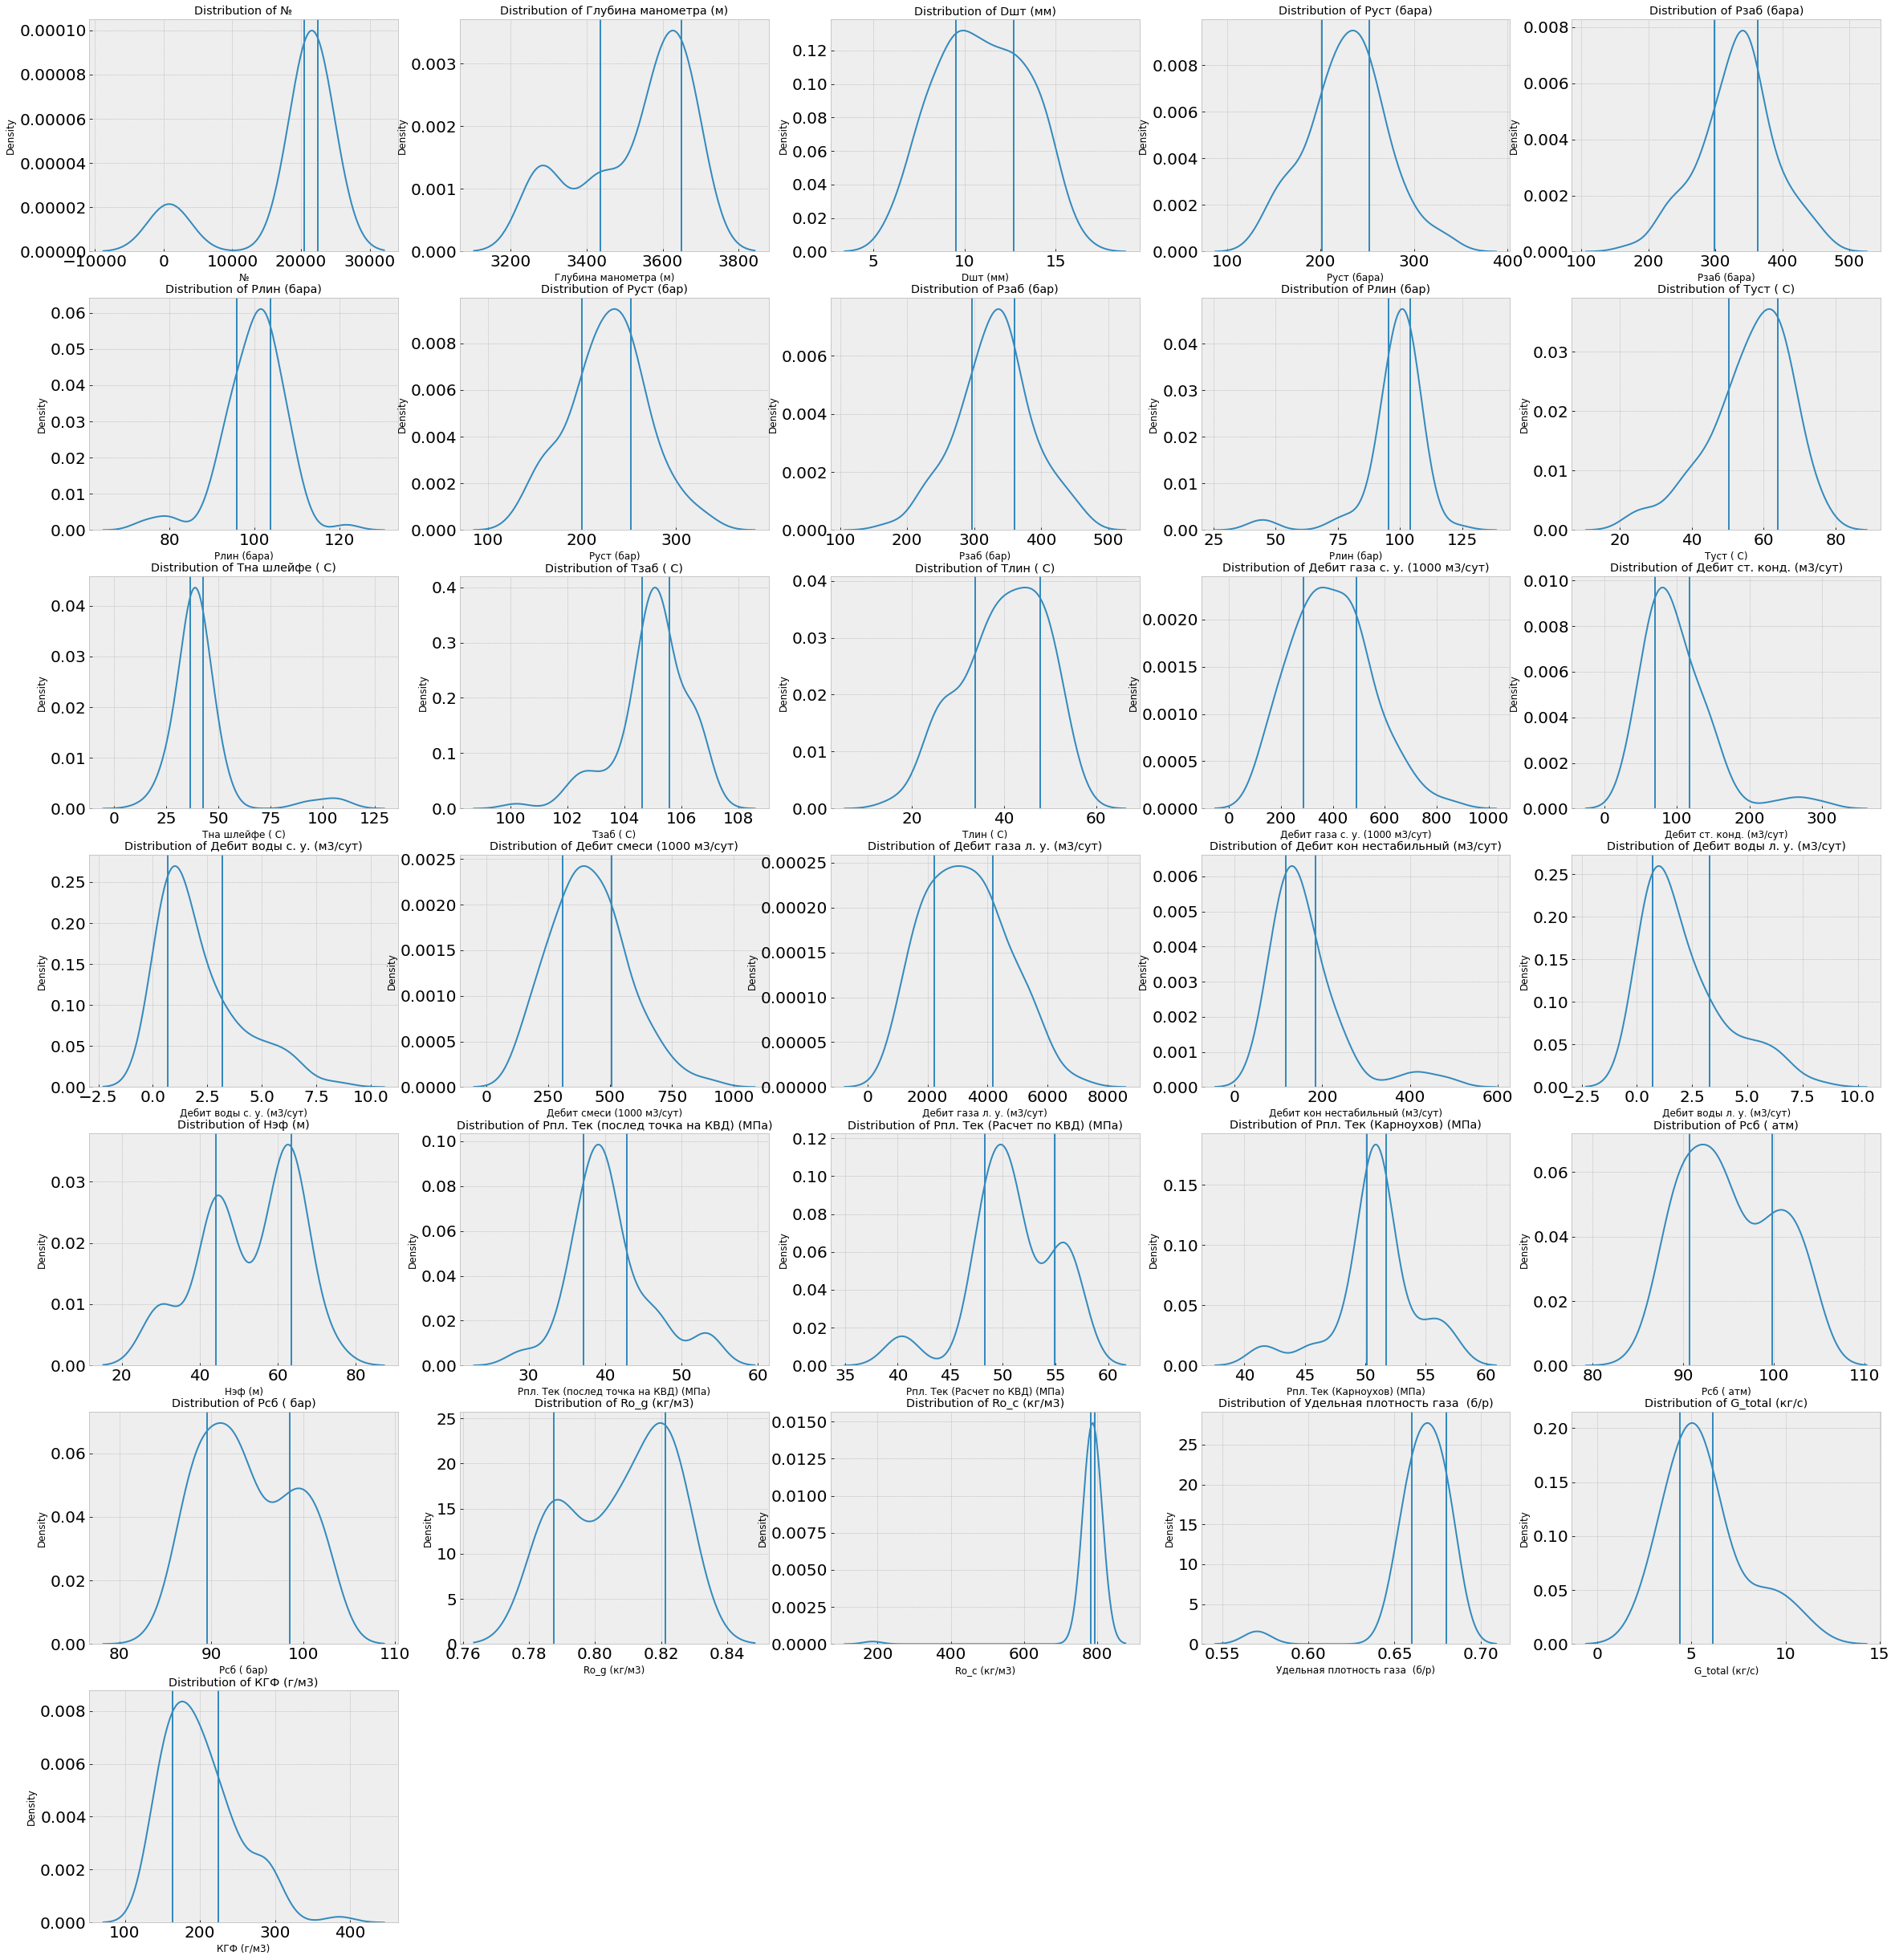

In [ ]:
plt.figure(figsize=(40, 50))
plt.style.use('bmh')

num = 0
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(8, 5, num)
    plt.title(f'Distribution of {col}')
    graph = sns.kdeplot(df[col])
    graph.axvline(df[col].quantile(0.25))
    graph.axvline(df[col].quantile(0.75))

In [ ]:
#Gain_ratio

In [ ]:
def group(value, quantiles):
    if (value != value):
        return np.nan
    for i in range(len(quantiles) - 1):
        if((value < quantiles[i + 1]) and (value >= quantiles[i])):
            return i
    
    return len(quantiles) - 2

In [ ]:
np.linspace(0,1,5)[1:-1]

array([0.25, 0.5 , 0.75])

In [ ]:
class Target():
    
    """
    name 
    size
    quantile
    group_distribution
    """
    def __init__(self, name):
        self.name = name
        
    def initialize(self, n_partition, values):
        sorted_values = sorted(values)
        self.quantile = [np.nanquantile(sorted_values, i) for i in np.linspace(0,1,n_partition + 1)]
        self.group_distribution = [group(val, self.quantile) for val in values]
        
    def info_T(self):
        result = 0
        T = 0
        self.partition = {}
        for obj in self.group_distribution:
            if obj == obj:
                T += 1
                if int(obj) in self.partition.keys():
                    self.partition[int(obj)] += 1
                else:
                    self.partition[int(obj)] = 1
        self.size = T
        self.distribution = {}
        for key in self.partition.keys():
            self.distribution[key] = self.partition[key]/self.size
            result -= (self.distribution[key])*(np.log(self.distribution[key]))/np.log(2)
        self.entropy = result

In [ ]:
targets_names = target
targets = {}
for t in targets_names:
    targets[t] = Target(t)
    targets[t].initialize(N_PARTITION, df[t])
    targets[t].info_T()
    print(targets[t].entropy)

1.9997515532022072
1.9957808479084207


In [ ]:
new_data = copy.deepcopy(df)
for t in targets.keys():
    new_data[t + 'group'] = targets[t].group_distribution

In [ ]:
class Feature():
    
    """
    name
    size
    valid
    
    """
    def __init__(self, name):
        self.name = name
        self.valid = True

    def create_partition(self, values, column, target_column):
        if(len(list(values)) == 0):
            self.valid = False
        T = 0
        self.partition = {}
        for obj in values.iterrows():
            if(obj[1][target_column] == obj[1][target_column]):
                if obj[1][column] == obj[1][column]:
                    if obj[1][column] in self.partition.keys():
                        self.partition[obj[1][column]] += 1
                    else:
                        self.partition[obj[1][column]] = 1
            T += 1
        self.size = T
        
        self.distribution = {}
        for key in self.partition.keys():
            self.distribution[key] = self.partition[key]/self.size
        
            
    def info_X(self):
        result = 0
        for key in self.distribution.keys():
            if (self.distribution[key]/self.size != 0):
                result -= (self.distribution[key])*np.log(self.distribution[key])/np.log(2)
        return result
        
    def get_conditional_entropy(self, test_data, target_column, T):
        result = 0
        for key in self.distribution.keys():
            cond_entr = 0
            targets = list(test_data[test_data[self.name] == key][test_data[target_column] == test_data[target_column]][target_column])
            if (len(targets) == 0):
                return 0
            dct = {}
            for objective in targets:
                if (objective in dct.keys()):
                    dct[objective] += 1
                else:
                    dct[objective] = 1
            for add_key in dct.keys():
                cond_entr -= (dct[add_key]/len(targets))*np.log(dct[add_key]/len(targets))/np.log(2)
            result += (len(targets)/T)*cond_entr
        return result

In [ ]:
targets_names

['КГФ (г/м3)', 'G_total (кг/с)']

In [ ]:
GAIN_RATIO_TARGET = {}

features = {}

for target_column in targets_names:
    GAIN_RATIO_TARGET[target_column] = {}
    for column in df.columns[:-2]:
        feat = Feature(column)
        feat.create_partition(df[[column, target_column]], column, target_column)
        infX = feat.info_X()
        entr = feat.get_conditional_entropy(new_data[[column, target_column+'group']], target_column+'group', targets[target_column].size)
        GAIN_RATIO_TARGET[target_column][column] = (targets[target_column].entropy - entr)/infX


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
GAIN_RATIO_TARGET

{'G_total (кг/с)': {'Dшт (мм)': 0.8522388648010819,
  'Pлин (бара)': 1.2340878551946524,
  'Pсб ( атм)': 1.2340878551946524,
  'Pсб ( бар)': 1.2340878551946524,
  'Ro_c (кг/м3)': 0.7714654545429916,
  'Ro_g (кг/м3)': 0.7714654545429916,
  'Tлин ( С)': 1.2340878551946524,
  'Глубина манометра (м)': 0.7548135765066784,
  'Дата': 1.2340878551946524,
  'Дебит воды л. у. (м3/сут)': 1.0325088090002752,
  'Дебит воды с. у. (м3/сут)': 1.2340878551946524,
  'Дебит газа л. у. (м3/сут)': 1.2340878551946524,
  'Дебит газа с. у. (1000 м3/сут)': 1.2340878551946524,
  'Дебит кон нестабильный (м3/сут)': 1.2340878551946524,
  'Дебит смеси (1000 м3/сут)': 1.2340878551946524,
  'Дебит ст. конд. (м3/сут)': 1.2340878551946524,
  'Нэф (м)': 0.2652454455950848,
  'Рзаб (бар)': 1.2340878551946524,
  'Рзаб (бара)': 1.2340878551946524,
  'Рлин (бар)': 1.250719693843767,
  'Рпл. Тек (Карноухов) (МПа)': 0.6018250574903513,
  'Рпл. Тек (Расчет по КВД) (МПа)': 0.7714654545429916,
  'Рпл. Тек (послед точка на КВД) (

In [ ]:
G_total_importance = sorted(GAIN_RATIO_TARGET['G_total (кг/с)'].items(), key=lambda x: x[1], reverse = True)

<BarContainer object of 30 artists>

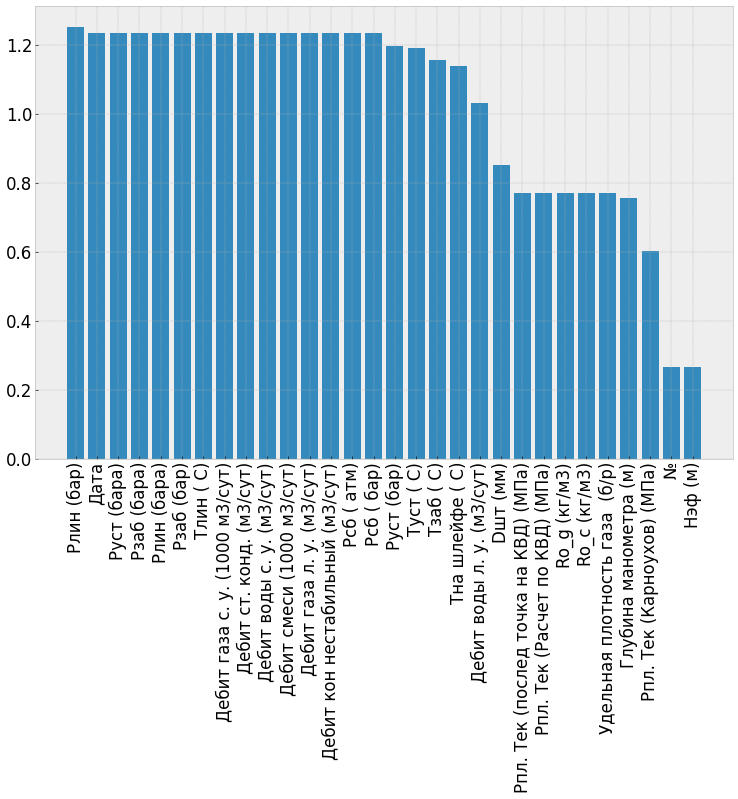

In [ ]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(15, 10), dpi=60)
plt.xticks(rotation=90)
plt.bar([obj[0] for obj in G_total_importance], [obj[1] for obj in G_total_importance])

In [ ]:
KGF_total_importance = sorted(GAIN_RATIO_TARGET['КГФ (г/м3)'].items(), key=lambda x: x[1], reverse = True)

<BarContainer object of 30 artists>

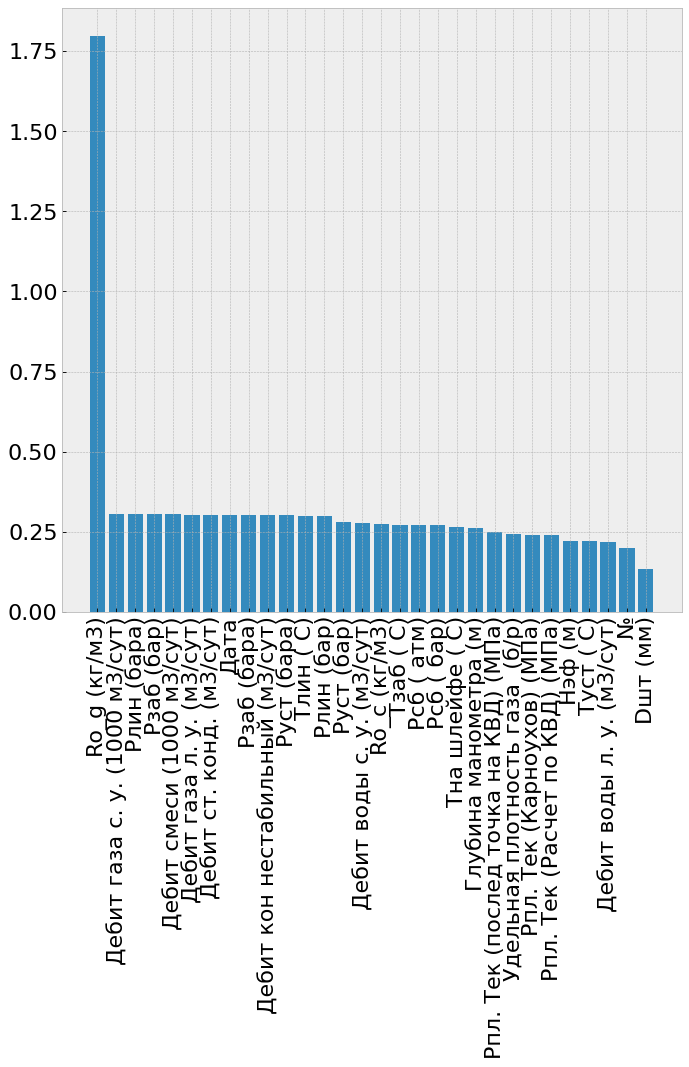

In [ ]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(10, 10), dpi=80)
plt.xticks(rotation=90)
plt.bar([obj[0] for obj in KGF_total_importance], [obj[1] for obj in KGF_total_importance])